# Introduction

This note book plots the figures for "Cross-feeding Creates Tipping Points in Microbiome Diversity"

In [2]:
using Pkg

Pkg.activate("..")

# using LinearAlgebra
# using Distributions
using Random
using StatsBase


# using ForwardDiff
using LambertW
using Roots 

using Graphs
using CairoMakie
using GraphMakie
using JLD2

# using DelimitedFiles

include("../Code/MiNet//MiNet.jl")

  Activating project at `~/Projects/Working/HIFMB/MiNet`
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0] (cache misses: wrong dep version loaded (8), wrong source (2))
[ Info: Precompiling AccessorsStructArraysExt [deedf894-762e-575a-ad8b-1df4bba63293] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819] (cache misses: wrong dep version loaded (6))


Main.MiNet

In [5]:
function plot_bifurcation!(ax, xvec, yvec; args...)
    if any(length.(yvec) .== 3)
        b_order = 0
        #if not all in the multistable
        if !all(length(yvec) .== 3)
            b_order = minimum(yvec[end]) < maximum(yvec[1]) ? :hl : :lh 
        else
            b_order = yvec[end][2] < yvec[1][2] ? :hl : :lh
        end
        
        #plot branches
        if b_order == :hl
            inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], maximum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], minimum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        elseif b_order == :lh
             inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], minimum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], maximum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        end
    else
        lines!(ax, xvec, [y[1] for y = yvec]; args...)
    end
end

plot_bifurcation! (generic function with 1 method)

# Figure 1

In [3]:
#load results
res = load("../Results/JLD2/fig_1.jld2")
sim_mat = res["sim"]
pred_mat = res["pred"]
b0_sols,c0_sols = res["phase"]

(Vector[[0.3678779775776458, 0.36788246848374395] [0.1921037626945995] … [0.06601189614262093] [0.0660102020857272]; [0.5987521512648808] [0.23289445739362424, 0.3629849474246935, 0.5219399219940397] … [0.06133202293987158] [0.06133036254942721]; … ; [0.9995144203938927] [0.9995144030295645] … [4.9102027365913584e-5, 0.17537359531740518, 0.9995127100777783] [4.908512301996606e-5, 0.1787488322535957, 0.9995126925353452]; [0.9995455427150419] [0.9995455275064458] … [4.562335388948242e-5, 0.1712161491767461, 0.999544045214965] [4.560741255589713e-5, 0.17455280027406955, 0.9995440298604361]], Vector[[0.6321190952318496, 0.6321235861284034] [0.4012478487351202] … [0.00048557960610728923] [0.00045445728495807636]; [0.807896237305401] [0.47806007800595995, 0.6370150525753033, 0.7671055426063755] … [0.0004855969704354868] [0.0004544724935542366]; … ; [0.9339881038573791] [0.9386679770601284] … [0.00048728992222168976, 0.8246264046825948, 0.999950897972634] [0.00045595478503501763, 0.8287838508

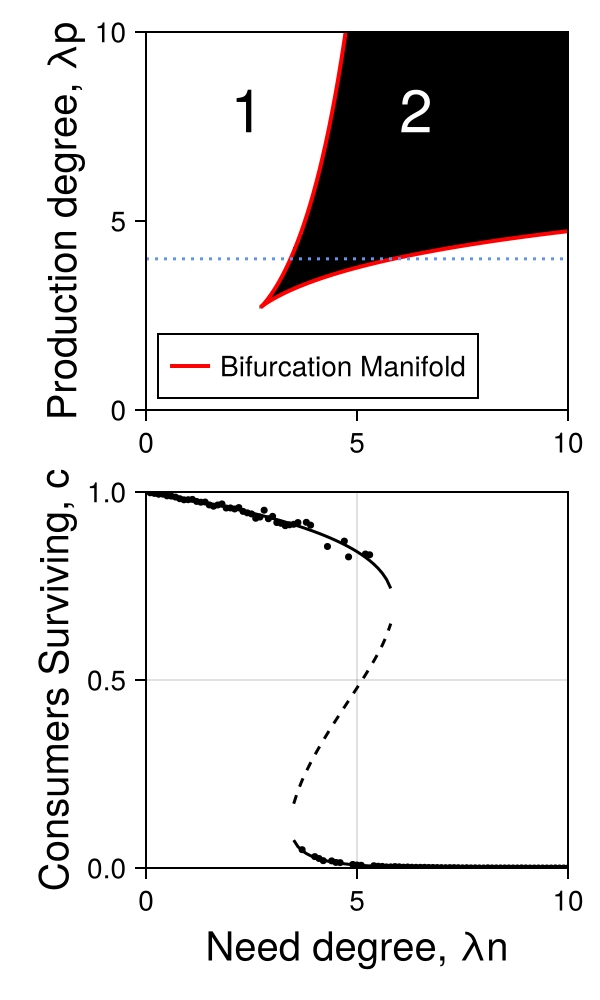

In [4]:
#params
n_l = 100
l_vec = range(exp(1), 10.0, length = n_l)

n_l_sim = 100
l_vec_sim = range(0.1, 10.0, length = n_l_sim)

ρ = 0.0
N = 10000
p_vec = [4.0]



#plot
f = Figure(size = (300,500))

style = (xlabelsize = 20, ylabelsize = 20)

ax = Axis(f[1,1],
                  ylabel = "Production degree, λp",
                    limits = (0,10.0,0,10.0); style...)

hidedecorations!(ax,ticklabels=false,ticks=false, label = false)

#plot phase space
N_b0 = length.(b0_sols)
heatmap!(ax, l_vec, l_vec, N_b0', colormap = cgrad(:greys, rev = true))

# #plot manifolds
λc = l_vec
λb = hcat(MiNet.bifurcation_manifold.(λc)...)

lines!(ax, λc, λb[1,:], color = "red", linewidth = 2, label = "Bifurcation Manifold")
lines!(ax, λc, λb[2,:], color = "red", linewidth = 2)

# #plot slice
hlines!(ax, p_vec, linestyle = :dot, color = :cornflowerblue)

text!(ax, 2, 7, text = "1", color = "black", fontsize = 30)
text!(ax, 6, 7, text = "2", color = "white", fontsize = 30)

axislegend(ax=ax, position = :lb)

# #plotting
ax = Axis(f[2,1], xlabel = "Need degree, λn", ylabel = "Consumers Surviving, c", limits = (0,10.0,0,1.0);style...)

for j = 2
    c = :black #resample_cmap(:reds, length(p_vec))[j]
    plot_bifurcation!(ax, l_vec_sim, pred_mat[:,j,1], color = c)
    for i = eachindex(l_vec_sim)
            
            #sim
            y = [sim_mat[i,j,1]]
            x = fill(l_vec_sim[i], length(y))
            # lb = quantile(y,0.05)
            # ub = quantile(y,0.95)
            # errorbars!(ax, [mean(x)],[mean(y)],[mean(y) - lb],[mean(y) - ub], color = "black")
            scatter!(ax, x ,y, markersize = 5, color = c)
    end
end

f

In [40]:
save("../Results/Figures/PhaseTrans.pdf", f)

CairoMakie.Screen{PDF}


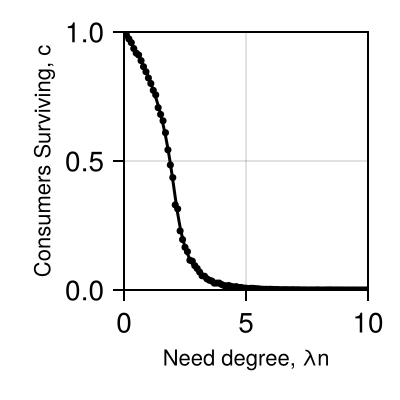

In [5]:
f = Figure(size = (200,200))

style = (xlabelsize = 11, ylabelsize = 11)
ax = Axis(f[1,1], xlabel = "Need degree, λn", ylabel = "Consumers Surviving, c", limits = (0,10.0,0,1.0);style...)

for j = 1
    c = :black #resample_cmap(:reds, length(p_vec))[j]
    plot_bifurcation!(ax, l_vec_sim, pred_mat[:,j,1], color = c)
    for i = eachindex(l_vec_sim)
            
            #sim
            y = [sim_mat[i,j,1]]
            x = fill(l_vec_sim[i], length(y))
            # lb = quantile(y,0.05)
            # ub = quantile(y,0.95)
            # errorbars!(ax, [mean(x)],[mean(y)],[mean(y) - lb],[mean(y) - ub], color = "black")
            scatter!(ax, x ,y, markersize = 5, color = c)
    end
end

f

In [141]:
save("../Results/Figures/PhaseTrans_inset.pdf", f)

CairoMakie.Screen{PDF}


# Figure S1

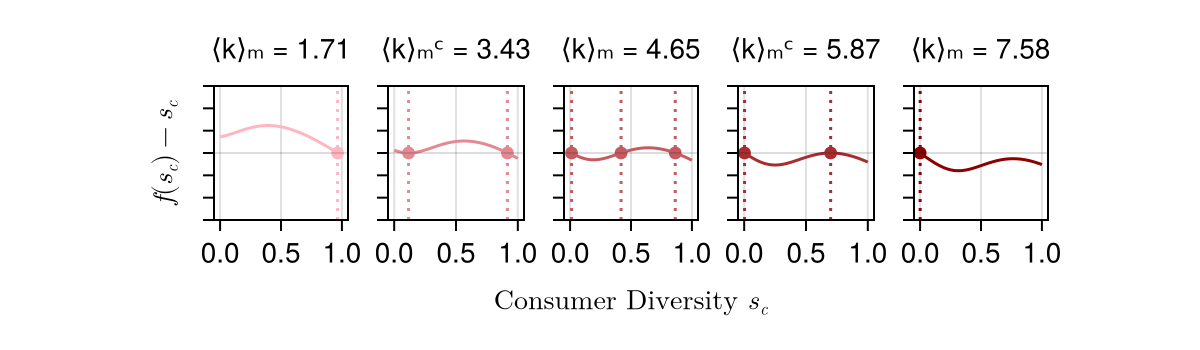

In [7]:
## bifurcation plot
F(X,Y,λ) = exp(λ[1]*(X − 1) + λ[2]*(Y − 1) + λ[3]*(X*Y − 1))

λn = 4.0
#get critical points
λc_crit = MiNet.bifurcation_manifold(λn) |> sort

d = [λc_crit[1] / 2, λc_crit[1], mean(λc_crit), λc_crit[2],λc_crit[2] + λc_crit[1] / 2]

lc_vec = [[λn, l, 0.0] for l = d]
lm_vec = [[l, λn, 0.0] for l = d]

C_vec = [x -> F(x[1],x[2],l) for l = lc_vec]
M_vec = [x -> F(x[1],x[2],l) for l = lm_vec]



f = Figure(size = (600,175))
x_vec = range(0,1.0, length = 100)

for i = eachindex(d)
    ax = Axis(f[1,i], aspect = 1)
    hidedecorations!(ax, grid = false, ticks = false,ticklabels=false)
    hideydecorations!(ax, ticks=false)
    f_sol = MiNet.arrival_prop_funcs.(C_vec[i], M_vec[i])
    b1(x) = f_sol[:c](f_sol[:m](x)) - x

    c = resample_cmap(:reds, length(d))[i]
    style = d[i] ∈ λc_crit ? :dash : :solid

    #find solutions
    y_vec = b1.(x_vec)
    lines!(ax, x_vec, y_vec, color = c)

    sol = find_zeros(b1, -0, 1)
    scatter!(ax, sol, fill(0.0,length(sol)), color = c)
    vlines!(ax, sol, color = c, linestyle = :dot)
    
    hlines!(ax, 0.0, color = :black, linewidth = 0.1)
    
    if d[i] ∉ λc_crit
        Label(f[0,i], "⟨k⟩ₘ = $(round(d[i],digits = 2))")
    else
        Label(f[0,i], "⟨k⟩ₘᶜ = $(round(d[i],digits = 2))")
    end

    ylims!(ax, -0.75,0.75)
end

# linkyaxes!(f.content...)

Label(f[2,1:5],L"\text{Consumer Diversity} \ s_c")
Label(f[1,0 ],L"f(s_c) - s_c", rotation = pi/2, tellheight = false)

# [colsize!(f.layout, i, Auto()) for i = 1:5]
# resize_to_layout!(f)

colgap!(f.layout, 10)
rowgap!(f.layout, 10)

f

In [70]:
save("../Results/Figures/selfconsistency.svg", f)

CairoMakie.Screen{SVG}


## Figure 2

In [110]:
res = load("../Results/JLD2/fig_2.jld2")
b0_sim,c0_sim = res["sim"]
b0_pred,c0_pred = res["pred"]

(Vector[[0.0] [0.0] … [0.0] [0.0]; [4.5401991051803527e-7] [5.017717455937171e-7] … [0.008319065713754637] [0.00912765271608623]; … ; [4.469117117566721e-5, 0.1762938634036697, 0.9794537500365135] [4.9412254263229206e-5, 0.17479097913062333, 0.979459240712659] … [0.97998913036536] [0.9799945654629889]; [4.514927084500596e-5, 0.17541434606259335, 0.9895009111752979] [4.991896378023573e-5, 0.17391425517333506, 0.98950592558725] … [0.9899900644757068] [0.9899950324721813]], Vector[[1.0] [1.0] … [1.0] [1.0]; [0.9048415261873215] [0.905793538683199] … [0.9996666229173092] [0.9999131446624969]; … ; [5.5476386939900025e-5, 0.00032325749119511683, 0.9945523926874911] [0.010054924216027166, 0.010315251273162388, 0.9946609318192865] … [0.9999978261912167] [0.9999994565610657]; [5.01973406739879e-5, 0.00028993420519165695, 0.9950215455419091] [0.010049697737640199, 0.010282761213761604, 0.9951207268594712] … [0.9999980129938527] [0.9999995032595561]])

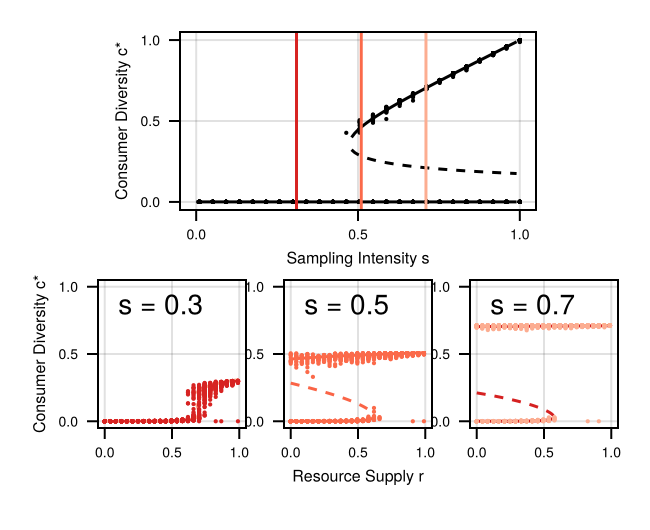

In [120]:
#Parameters
λn=10.0
λp=10.0

#generate p_list
n_s = 100
s_vec = range(0.0, 0.99, length = n_s)

#network simulations
#network size
n_s_network = 25
s_vec_network = range(0.0, 0.99, length = n_s_network)

N = 10000
n_r = 100
n_rep = 1

inch = 96
pt = 4/3
cm = inch / 2.54

f = Figure(size = (8.6cm,7cm))

style = (xlabelsize = 8, ylabelsize = 8, xticklabelsize = 7, yticklabelsize = 7)

ax = Axis(f[1,1:6], xlabel = "Sampling Intensity s", ylabel = "Consumer Diversity c*", aspect = 2; style...)

cmap = :Reds
#initial consumer bifurcation - sample prop 1-s
c = resample_cmap(cmap, n_s)[1]
series!(ax, 1 .-s_vec_network, b0_sim[:,:,1,1], solid_color = :black, linewidth = 0, markersize = 3)
plot_bifurcation!(ax, s_vec, b0_pred[:,1], color = :black)

ind = [8,13,18]
vlines!(ax, s_vec[ind .* 4], color =  resample_cmap(cmap, n_s_network)[ind |> reverse])

#vary resource supply - remove prop r
indx = [1:2,3:4,5:6]
ax2 = [Axis(f[2,indx[p]], aspect = 1; style...) for p = 1:3]
ax2[1].ylabel = "Consumer Diversity c*"
ax2[2].xlabel = "Resource Supply r"
for (p,i) = enumerate((ind) .* 4)
    c = resample_cmap(cmap, n_s)[i]
    plot_bifurcation!(ax2[p], s_vec, b0_pred[i,:], color = c)
end
x = 0
for (p,i) =  enumerate(reverse(ind))
    c = resample_cmap(cmap, n_s_network)[i]
    series!(ax2[p], s_vec_network, b0_sim[:,i,:,1], solid_color = c, linewidth = 0, markersize = 3)
    s = round(s_vec[ind .* 4][p]; digits = 1)
    text!(ax2[p], 0.1,0.75, text = "s = $s")
end

linkaxes!(ax,ax2)
rowgap!(f.layout, 0)
colgap!(f.layout, 0)

save("../Results/Figures/removal_plots_2.svg", f, px_per_unit = 300/inch)

f

# Figure S2

In [12]:
function plot_bifurcation!(ax, xvec, yvec; args...)
    if any(length.(yvec) .== 3)
        b_order = 0
        #if not all in the multistable
        if !all(length(yvec) .== 3)
            b_order = minimum(yvec[end]) < maximum(yvec[1]) ? :hl : :lh 
        else
            b_order = yvec[end][2] < yvec[1][2] ? :hl : :lh
        end
        #plot branches
        if b_order == :hl
            inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], maximum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], minimum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        elseif b_order == :lh
             inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], minimum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], maximum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        end
    else
        lines!(ax, xvec, [y[1] for y = yvec]; args...)
    end
end

plot_bifurcation! (generic function with 1 method)

In [13]:
#params
n_l = 50
l_vec = range(exp(1), 10.0, length = n_l)
n_cor = 6
cor_vec = range(0,1.0, length = n_cor) 

ρ = 0.0
N = 100
p_vec = [4.0]

1-element Vector{Float64}:
 4.0

In [14]:
res = load("../Results/JLD2/fig_cor.jld2")
b0_phase,c0_phase = res["phase"];
b0_sim,c0_sim = res["sim"]

b0_phase[isempty.(b0_phase)] .= Ref([])
b0_sim[isempty.(b0_sim)] .= Ref([]);

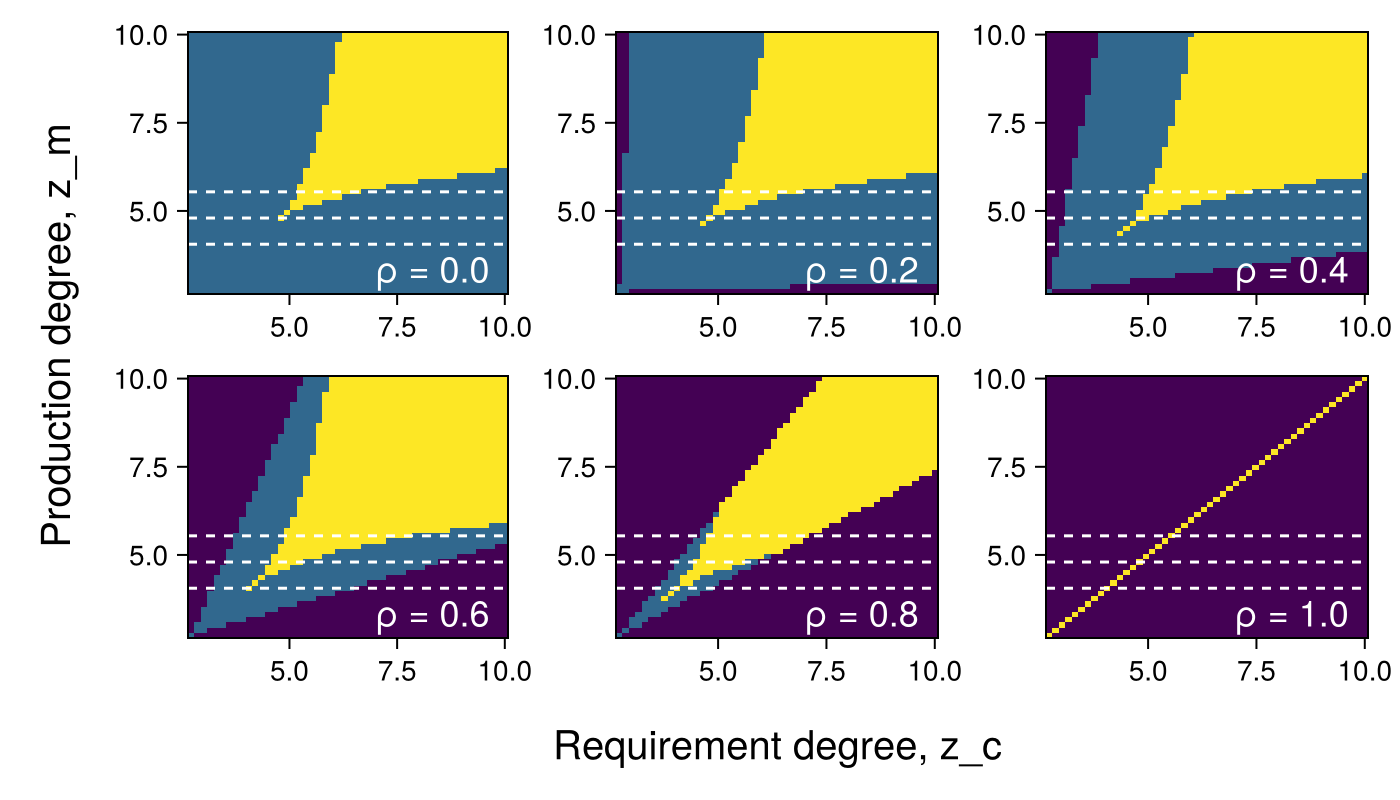

In [15]:
f = Figure(size = (700,400))

for i = 1:6
    ax = Axis(f[(i-1) ÷ 3, (i-1) % 3])
    heatmap!(ax,l_vec, l_vec, length.(b0_phase)[:,:,i], colorrange = (0,3))
    text!(7,2.75,text=string("ρ = ",cor_vec[i]), color = :white, fontsize = 18)
    hlines!(ax, l_vec[[10,15,20]], color = :white, linestyle = :dash)
end

Label(f[2,0:2], "Requirement degree, z_c", fontsize = 20)
Label(f[0:1,-1], "Production degree, z_m", rotation = pi/2, fontsize=20)

f

In [407]:
save("../Results/Figures/correlation_phase.svg", f)
save("../Results/Figures/correlation_phase.pdf", f)

CairoMakie.Screen{PDF}


# Figure S3

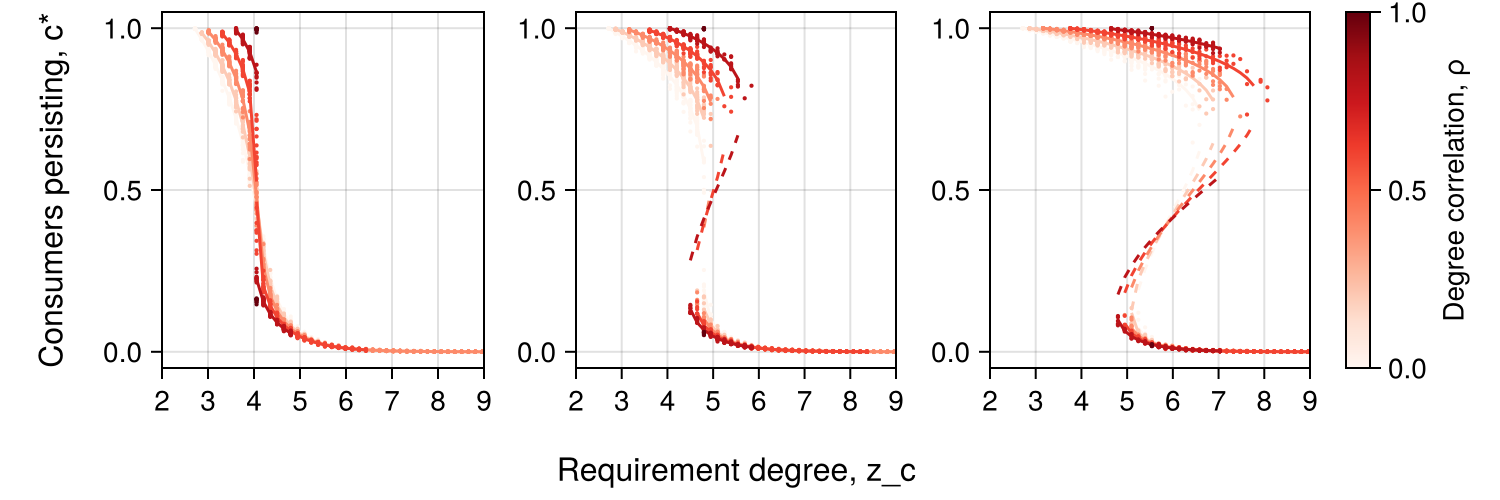

In [16]:
f = Figure(size=(750,250))

for (k,v) = enumerate([10,15,20])
    ax = Axis(f[1,k])
    xlims!(ax,2,9)
    n = v
    for i = 1:6
        c = resample_cmap(:Reds_9, 6)[i]
        ind = .!isempty.(b0_phase[:,n,i])
        plot_bifurcation!(ax,l_vec[ind], b0_phase[ind,n,i], color = c)
        for j = findall(ind)
            scatter!(ax, fill(l_vec[j], 20), vcat(b0_sim[j,n,i]...), color = c, markersize = 3)
        end
    end    
end

Colorbar(f[1,4], colorrange = (0,1), colormap = :Reds_9, label = "Degree correlation, ρ")

Label(f[2,1:3], "Requirement degree, z_c", fontsize = 16)
Label(f[1,0], "Consumers persisting, c*", rotation = pi/2, fontsize = 16)

f

In [17]:
save("../Results/Figures/correlation_bifurcation.svg", f)
save("../Results/Figures/correlation_bifurcation.pdf", f)

CairoMakie.Screen{PDF}
